In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime

In [82]:
import unidecode

# Explore raw data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('crimes_RJ'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
parte1 = pd.read_csv("raw_data/parte1.csv", sep=";", encoding='iso-8859-1')

In [5]:
parte1.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,risp,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
0,00787401-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,2009-01-01,...,RISP 02,Praia,masculino,1992-09-02,parda,Estudante,Ignorado,SANTA CRUZ,RIO DE JANEIRO,16.0
1,00908861-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,119a. Rio Bonito,119a. Rio Bonito,2009-01-01,2008-12-31,...,RISP 04,Via pública,sem informação,1979-06-20,sem informação,Cantor(a),Outra,SERRA DO SAMBE,RIO BONITO,29.0
2,00954561-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Volta Redonda,090a. Barra Mansa,2009-01-01,2009-01-01,...,RISP 05,Via pública,feminino,1966-03-28,parda,Ignorado,Genro,COLÔNIA S. ANTONIO,BARRA MANSA,42.0
3,00987771-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,145a. São João da Barra,145a. São João da Barra,2009-01-01,2009-01-01,...,RISP 06,Via pública,feminino,1988-09-28,branca,Estudante,Outra,TURF CLUB,CAMPOS,20.0
4,00987771-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,145a. São João da Barra,145a. São João da Barra,2009-01-01,2009-01-01,...,RISP 06,Via pública,masculino,1988-09-28,branca,Carteiro(a),Outra,CENTRO,SAO JOAO DA BARRA,20.0


In [6]:
parte1.columns

Index(['controle', 'ano', 'mes', 'titulo_do', 'total_rbft', 'conteudo', 'dp',
       'cisp', 'data_com', 'data_fato', 'hora_com', 'hora_fato', 'bairro_fato',
       'municipio_fato', 'aisp', 'risp', 'local', 'sexo', 'data_nasc', 'cor',
       'profissao', 'relacao', 'bairro_vit', 'municipio_vit', 'idade'],
      dtype='object')

In [13]:
parte1[["conteudo"]].value_counts()

conteudo
vítimas     220202
ambos          196
dtype: int64

In [15]:
parte2 = pd.read_csv("raw_data/parte2.csv", sep=";", encoding='iso-8859-1')

In [16]:
parte3= pd.read_csv("raw_data/parte3.csv", sep=";", encoding='iso-8859-1')

In [17]:
parte4= pd.read_csv("raw_data/parte4.csv", sep=";", encoding='iso-8859-1')

In [29]:
parte3[["conteudo"]].value_counts()

conteudo
casos       764923
vítimas      34498
ambos          579
dtype: int64

In [28]:
parte3[["total_rbft"]].value_counts()

total_rbft   
Roubo            513220
Furto            252282
Não se aplica     34498
dtype: int64

In [21]:
parte4[["total_rbft"]].value_counts()

total_rbft   
Roubo            504941
Furto            166592
Não se aplica     30136
dtype: int64

In [22]:
parte1[["total_rbft"]].value_counts()

total_rbft   
Não se aplica    220202
Roubo               196
dtype: int64

In [7]:
parte2.head()
parte2.shape

(800000, 23)

In [30]:
parte1.describe()

,ano,idade
count,220398.0,194499.000000
mean,2009.0,33.579031
std,0.0,14.374937
min,2009.0,0.000000
25%,2009.0,23.000000
50%,2009.0,31.000000
75%,2009.0,42.000000
max,2009.0,104.000000


In [31]:
parte2.describe()

,ano,idade
count,800000.000000,33761.000000
mean,2011.593226,21.623441
std,1.210999,14.345382
min,2010.000000,0.000000
25%,2010.000000,11.000000
50%,2012.000000,18.000000
75%,2013.000000,30.000000
max,2014.000000,105.000000


In [173]:
parte3 = pd.read_csv("raw_data/parte3.csv", sep=";", encoding='iso-8859-1')

In [174]:
parte3.describe()

,ano,idade
count,800000.000000,28369.000000
mean,2015.315565,22.480595
std,0.980450,14.481049
min,2014.000000,0.000000
25%,2014.000000,12.000000
50%,2015.000000,20.000000
75%,2016.000000,30.000000
max,2017.000000,105.000000


In [175]:
parte4 = pd.read_csv("raw_data/parte4.csv", sep=";", encoding='iso-8859-1')
parte4.describe()

,ano,idade
count,701669.000000,24357.000000
mean,2018.102339,21.870222
std,0.774154,14.438066
min,2017.000000,0.000000
25%,2017.000000,12.000000
50%,2018.000000,19.000000
75%,2019.000000,29.000000
max,2019.000000,118.000000


In [176]:
parte4.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
0,48706621-2017,2017,Maio,Roubo a transeunte,Roubo,casos,060a. Campos Elíseos,060a. Campos Elíseos,2017-05-18,2017-03-24,...,Duque de Caxias,Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
1,48710291-2017,2017,Maio,Furto a transeunte,Furto,casos,010a. Botafogo,005a. Mem de Sá,2017-05-18,2017-05-17,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
2,48713271-2017,2017,Maio,Furto a transeunte,Furto,casos,065a. Magé,065a. Magé,2017-05-18,2017-05-16,...,Magé,Estabelecimento comercial,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
3,48901422-2017,2017,Maio,Roubo de aparelho celular,Roubo,casos,029a. Madureira,029a. Madureira,2017-05-18,2017-05-13,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
4,48923711-2017,2017,Maio,Furto de telefone celular,Furto,casos,109a. Sapucaia,109a. Sapucaia,2017-05-18,2017-05-17,...,Sapucaia,Residência,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN


In [177]:
parte4.columns

Index(['controle', 'ano', 'mes', 'titulo_do', 'total_rbft', 'conteudo', 'dp',
       'cisp', 'data_com', 'data_fato', 'hora_com', 'hora_fato', 'bairro_fato',
       'municipio_fato', 'local', 'sexo', 'data_nasc', 'cor', 'profissao',
       'relacao', 'bairro_vit', 'municipio_vit', 'idade'],
      dtype='object')

In [178]:
parte4.shape

(701669, 23)

In [179]:
parte4_2019 = parte4[parte4["ano"] >=2019]

In [180]:
parte4_2019.shape

(249838, 23)

(array([27504., 28847., 28309., 25683., 24321., 24466., 23295., 23272.,
        21889., 22252.]),
 array([  0. ,  36.4,  72.8, 109.2, 145.6, 182. , 218.4, 254.8, 291.2,
        327.6, 364. ]),
 <BarContainer object of 10 artists>)

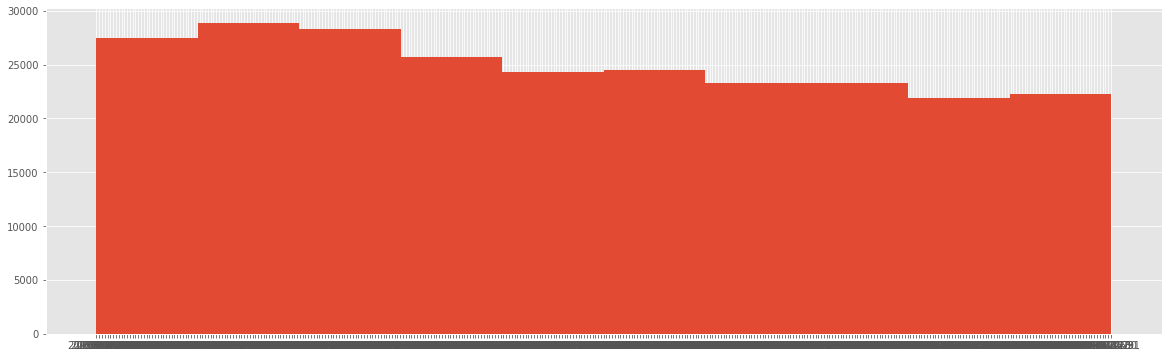

In [181]:
plt.figure(figsize=(20, 6))
plt.hist(parte4_2019.data_com)

In [186]:
parte4_2019.data_com

451831    2019-01-01
451832    2019-01-01
451833    2019-01-01
451834    2019-01-01
451835    2019-01-01
             ...    
701664    2019-12-31
701665    2019-12-31
701666    2019-12-31
701667    2019-12-31
701668    2019-12-31
Name: data_com, Length: 249838, dtype: object

In [187]:
parte4["municipio_fato"].value_counts()

Rio de Janeiro (Capital)     369943
São Gonçalo                   59236
Duque de Caxias               51506
Nova Iguaçu                   37485
Niterói                       25897
                              ...  
Laje do Muriaé                   32
Comendador Levy Gasparian        28
Rio das Flores                   22
São José de Ubá                  18
Macuco                           17
Name: municipio_fato, Length: 92, dtype: int64

In [188]:
parte4_Rio = parte4[parte4["municipio_fato"] =="Rio de Janeiro (Capital)"]

In [189]:
parte4_Rio.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
1,48710291-2017,2017,Maio,Furto a transeunte,Furto,casos,010a. Botafogo,005a. Mem de Sá,2017-05-18,2017-05-17,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
3,48901422-2017,2017,Maio,Roubo de aparelho celular,Roubo,casos,029a. Madureira,029a. Madureira,2017-05-18,2017-05-13,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
8,49350071-2017,2017,Maio,Roubo de carga,Roubo,casos,044a. Inhaúma,027a. Vicente de Carvalho,2017-05-18,2017-05-18,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
9,49358071-2017,2017,Maio,Roubo a transeunte,Roubo,casos,042a. Recreio,042a. Recreio,2017-05-18,2017-05-17,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
10,49473391-2017,2017,Maio,Roubo a transeunte,Roubo,casos,040a. Honório Gurgel,040a. Honório Gurgel,2017-05-18,2017-04-23,...,Rio de Janeiro (Capital),Favela,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN


In [190]:
parte4_Rio.drop(columns=["profissao","relacao","idade", "data_com", "sexo", "titulo_do","cisp", "hora_com", "dp", "data_nasc","cor","controle","bairro_vit","municipio_vit"],inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [191]:
parte4_Rio[["ano","mes","total_rbft","data_fato", "hora_fato", "bairro_fato", "local"]]

,ano,mes,total_rbft,data_fato,hora_fato,bairro_fato,local
1,2017,Maio,Furto,2017-05-17,12:05,Centro,Via pública
3,2017,Maio,Roubo,2017-05-13,00:16,Madureira,Via pública
8,2017,Maio,Roubo,2017-05-18,14:20,Vicente de carvalho,Via pública
9,2017,Maio,Roubo,2017-05-17,20:30,Recreio dos bandeirantes,Via pública
10,2017,Maio,Roubo,2017-04-23,18:30,Turiacu,Favela
...,...,...,...,...,...,...,...
701661,2019,Dezembro,Furto,2019-12-29,19:00,Copacabana,Via pública
701662,2019,Dezembro,Furto,2019-12-30,11:45,Centro,Interior de coletivo
701663,2019,Dezembro,Furto,2019-12-31,19:00,Centro,Estação metroviária
701667,2019,Dezembro,Roubo,2019-12-30,17:35,sem informação,Via pública


In [192]:
parte4_Rio.shape

(369943, 9)

In [193]:
parte4_Rio.bairro_fato.value_counts()

Centro                24214
sem informação        17683
Bangu                 16408
Campo grande          12091
Barra da tijuca       11260
                      ...  
Anchieta / ricardo        1
.barros filho             1
Del cstilho               1
Alfa barra                1
Praia do saco             1
Name: bairro_fato, Length: 1665, dtype: int64

In [194]:
parte4_Rio_centro = parte4_Rio[parte4_Rio['bairro_fato']=='Centro']
parte4_Rio_centro

,ano,mes,total_rbft,conteudo,data_fato,hora_fato,bairro_fato,municipio_fato,local
1,2017,Maio,Furto,casos,2017-05-17,12:05,Centro,Rio de Janeiro (Capital),Via pública
12,2017,Maio,Roubo,casos,2017-05-09,20:00,Centro,Rio de Janeiro (Capital),Via pública
18,2017,Maio,Furto,casos,2017-05-15,12:00,Centro,Rio de Janeiro (Capital),Via pública
20,2017,Maio,Roubo,casos,2017-05-18,23:00,Centro,Rio de Janeiro (Capital),Via pública
33,2017,Maio,Furto,casos,2017-04-26,12:50,Centro,Rio de Janeiro (Capital),Estação metroviária
...,...,...,...,...,...,...,...,...,...
701532,2019,Dezembro,Furto,casos,2019-12-30,21:00,Centro,Rio de Janeiro (Capital),Via pública
701572,2019,Dezembro,Furto,casos,2019-12-29,03:30,Centro,Rio de Janeiro (Capital),Via pública
701597,2019,Dezembro,Furto,casos,2019-12-31,09:00,Centro,Rio de Janeiro (Capital),Via pública
701662,2019,Dezembro,Furto,casos,2019-12-30,11:45,Centro,Rio de Janeiro (Capital),Interior de coletivo


In [195]:
parte4_Rio_centro.dtypes

ano                int64
mes               object
total_rbft        object
conteudo          object
data_fato         object
hora_fato         object
bairro_fato       object
municipio_fato    object
local             object
dtype: object

In [196]:
parte4_Rio_centro.data_fato = pd.to_datetime(parte4_Rio_centro.data_fato)#['Mycol'] =  pd.to_datetime(raw_data['Mycol'])


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [197]:
#parte4_Rio_centro[parte4_Rio_centro['data_fato']>=2019]
parte4_Rio_centro[parte4_Rio_centro.data_fato == parte4_Rio_centro.data_fato.min()].index

Int64Index([32286], dtype='int64')

In [198]:
parte4_Rio_centro.shape

(24214, 9)

In [199]:
parte4_Rio_centro[parte4_Rio_centro.index==32286].data_fato

32286   1917-06-23
Name: data_fato, dtype: datetime64[ns]

In [200]:
parte4_Rio_centro = parte4_Rio_centro[parte4_Rio_centro.data_fato>='2019-01-01']

In [201]:
parte4_Rio_centro_via= parte4_Rio_centro[parte4_Rio_centro.local=='Via pública']
parte4_Rio_centro_interior = parte4_Rio_centro[parte4_Rio_centro.local=='Interior de coletivo']

In [202]:
parte4_Rio_centro.local.value_counts()

Via pública                           6288
Interior de coletivo                   947
Outros                                 570
Estabelecimento comercial              179
Bar/restaurante                        129
Ignorado                               127
Estação ferroviária                    123
Estação metroviária                     84
Casa de show                            66
Boate                                   48
Interior de composição férrea           39
Interior de composição metroviária      36
Sem informação                          35
Aeroporto                               35
Estação rodoviária                      33
Semáforo                                27
Residência                              22
Estab. público estadual                 20
Parque                                  20
Hospital, clínica e similares           16
Interior de transporte alternativo      13
Estação de barcas                       12
Estacionamento                          12
Vila       

In [203]:
parte4_Rio_centro_via_count= parte4_Rio_centro_via.groupby('data_fato').count()[['ano']]
parte4_Rio_centro_interior_count = parte4_Rio_centro_interior.groupby('data_fato').count()[['ano']]

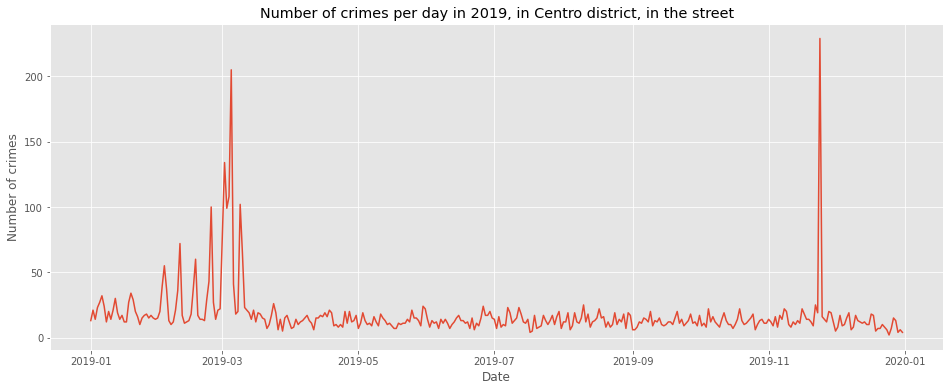

In [204]:
plt.figure(figsize=(16,6))
plt.plot(parte4_Rio_centro_via_count.index, parte4_Rio_centro_via_count.ano)

plt.xlabel("Date")
plt.ylabel("Number of crimes")
plt.title("Number of crimes per day in 2019, in Centro district, in the street")
plt.show()

Text(0.5, 1.0, 'Inside public transport')

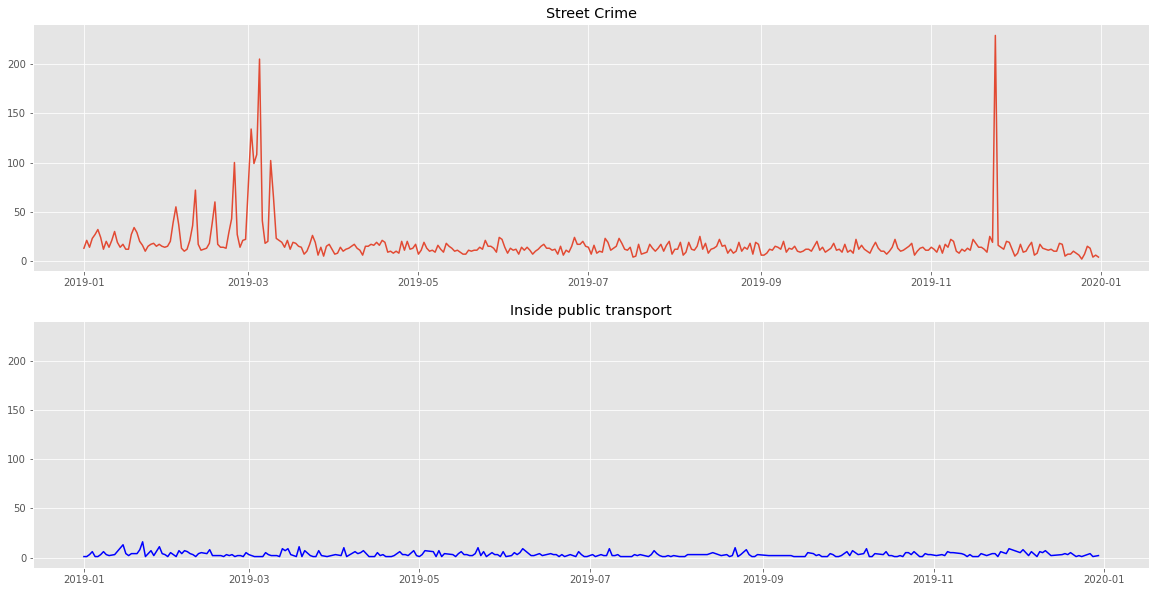

In [60]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
#for i in range(8):
#    feature_map = activations[i][0,:,:,15]
#    #feature_map = activations[i][0,0]
#    axs[i].imshow(feature_map, cmap=‘gray’)
axs[0].plot(parte4_Rio_centro_via_count.index, parte4_Rio_centro_via_count.ano)
axs[1].plot(parte4_Rio_centro_interior_count.index, parte4_Rio_centro_interior_count.ano,color="blue")
axs[0].get_shared_y_axes().join(axs[0], axs[1])
axs[0].set_title("Street Crime")
axs[1].set_title("Inside public transport")


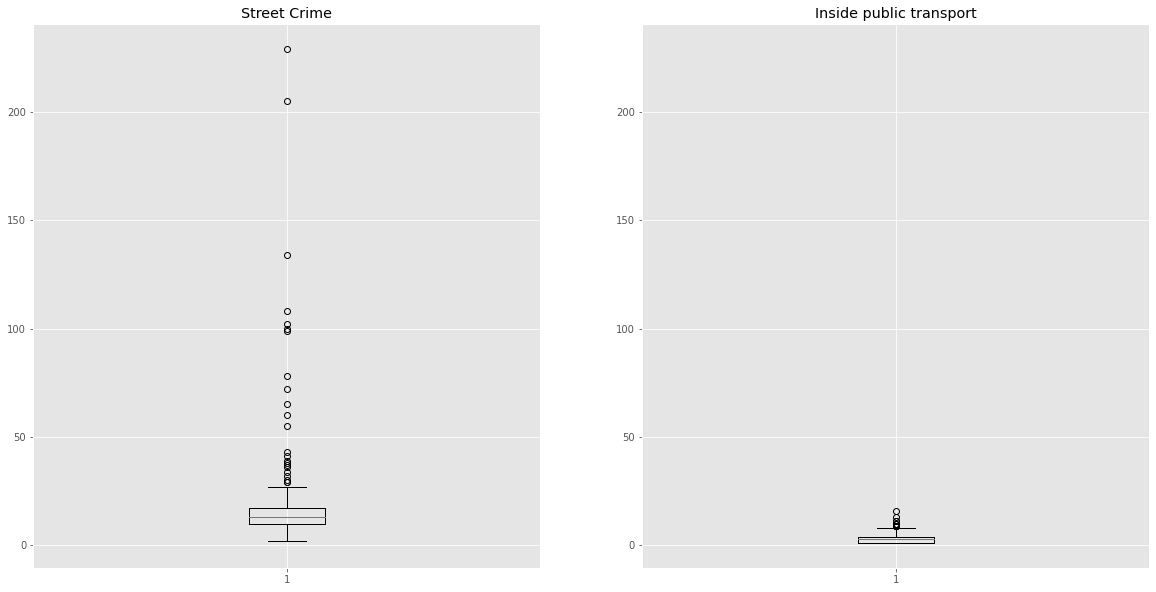

In [61]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
#for i in range(8):
#    feature_map = activations[i][0,:,:,15]
#    #feature_map = activations[i][0,0]
#    axs[i].imshow(feature_map, cmap=‘gray’)
axs[0].boxplot(x = parte4_Rio_centro_via_count.ano)
axs[0].set_title("Street Crime")

axs[1].boxplot(x = parte4_Rio_centro_interior_count.ano)
axs[1].set_title("Inside public transport")

axs[0].get_shared_y_axes().join(axs[0], axs[1])
plt.show()

In [62]:
parte1.shape[0]+parte2.shape[0]+parte3.shape[0]+parte4.shape[0]

2522067

In [63]:
parte4_Rio_group = parte4_Rio.groupby('bairro_fato').count()

In [64]:
parte4_Rio_group[parte4_Rio_group.ano>1000].sort_values('ano',ascending=False)[0:11].index

Index(['Centro', 'sem informação', 'Bangu', 'Campo grande', 'Barra da tijuca',
       'Copacabana', 'Madureira', 'Tijuca', 'Pavuna', 'Realengo',
       'Bonsucesso'],
      dtype='object', name='bairro_fato')

In [65]:
list_10_bairros = list(parte4_Rio_group[parte4_Rio_group.ano>1000].sort_values('ano',ascending=False)[0:11].index)

In [66]:
list_10_bairros.remove('sem informação')

In [67]:
list_10_bairros

['Centro',
 'Bangu',
 'Campo grande',
 'Barra da tijuca',
 'Copacabana',
 'Madureira',
 'Tijuca',
 'Pavuna',
 'Realengo',
 'Bonsucesso']

In [68]:
parte4_Rio_10bairros = parte4_Rio[parte4_Rio['bairro_fato'].isin(list_10_bairros)]

In [69]:
parte4_Rio_10bairros

,ano,mes,total_rbft,conteudo,data_fato,hora_fato,bairro_fato,municipio_fato,local
1,2017,Maio,Furto,casos,2017-05-17,12:05,Centro,Rio de Janeiro (Capital),Via pública
3,2017,Maio,Roubo,casos,2017-05-13,00:16,Madureira,Rio de Janeiro (Capital),Via pública
12,2017,Maio,Roubo,casos,2017-05-09,20:00,Centro,Rio de Janeiro (Capital),Via pública
18,2017,Maio,Furto,casos,2017-05-15,12:00,Centro,Rio de Janeiro (Capital),Via pública
20,2017,Maio,Roubo,casos,2017-05-18,23:00,Centro,Rio de Janeiro (Capital),Via pública
...,...,...,...,...,...,...,...,...,...
701651,2019,Dezembro,Não se aplica,vítimas,2019-12-31,18:40,Campo grande,Rio de Janeiro (Capital),Ignorado
701658,2019,Dezembro,Furto,casos,2019-12-31,17:00,Copacabana,Rio de Janeiro (Capital),Praia
701661,2019,Dezembro,Furto,casos,2019-12-29,19:00,Copacabana,Rio de Janeiro (Capital),Via pública
701662,2019,Dezembro,Furto,casos,2019-12-30,11:45,Centro,Rio de Janeiro (Capital),Interior de coletivo


In [70]:
parte4_Rio_10bairros_gr = parte4_Rio_10bairros.groupby(['data_fato','bairro_fato']).count()
parte4_Rio_10bairros_gr.reset_index(inplace=True)

In [71]:
parte4_Rio_10bairros_gr

,data_fato,bairro_fato,ano,mes,total_rbft,conteudo,hora_fato,municipio_fato,local
0,1710-10-24,Tijuca,1,1,1,1,1,1,1
1,1900-01-01,Madureira,1,1,1,1,1,1,1
2,1900-01-17,Bonsucesso,1,1,1,1,1,1,1
3,1917-06-23,Centro,1,1,1,1,1,1,1
4,1960-08-05,Tijuca,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
10521,2019-12-31,Copacabana,23,23,23,23,23,23,23
10522,2019-12-31,Madureira,4,4,4,4,4,4,4
10523,2019-12-31,Pavuna,2,2,2,2,2,2,2
10524,2019-12-31,Realengo,2,2,2,2,2,2,2


In [72]:
parte4_Rio_10bairros_gr = parte4_Rio_10bairros_gr[parte4_Rio_10bairros_gr.data_fato>='2019-01-01']

In [73]:
parte4_Rio_10bairros_gr

,data_fato,bairro_fato,ano,mes,total_rbft,conteudo,hora_fato,municipio_fato,local
6884,2019-01-01,Bangu,12,12,12,12,12,12,12
6885,2019-01-01,Barra da tijuca,10,10,10,10,10,10,10
6886,2019-01-01,Bonsucesso,5,5,5,5,5,5,5
6887,2019-01-01,Campo grande,4,4,4,4,4,4,4
6888,2019-01-01,Centro,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...
10521,2019-12-31,Copacabana,23,23,23,23,23,23,23
10522,2019-12-31,Madureira,4,4,4,4,4,4,4
10523,2019-12-31,Pavuna,2,2,2,2,2,2,2
10524,2019-12-31,Realengo,2,2,2,2,2,2,2


In [74]:
parte4_Rio_10bairros_gr[parte4_Rio_10bairros_gr.bairro_fato == "Centro"].max()

data_fato         2019-12-31
bairro_fato           Centro
ano                      252
mes                      252
total_rbft               252
conteudo                 252
hora_fato                252
municipio_fato           252
local                    252
dtype: object

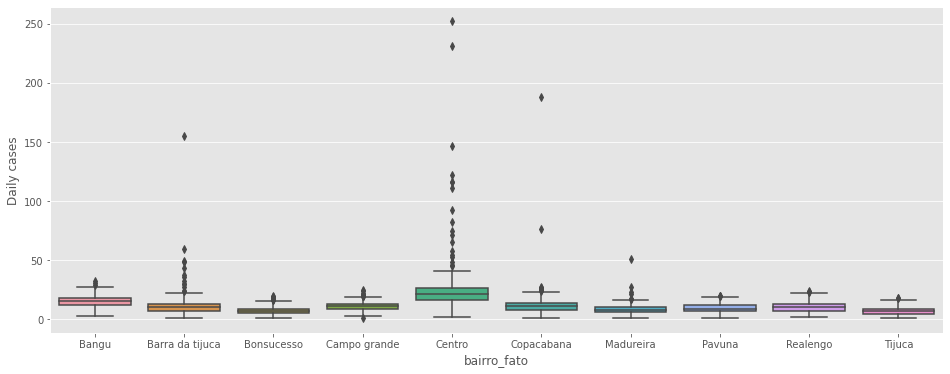

In [75]:
plt.figure(figsize=(16,6))
sns.boxplot(data=parte4_Rio_10bairros_gr, y = 'ano', x = 'bairro_fato')
plt.ylabel("Daily cases")
plt.show()

In [76]:
import seaborn as sns

In [77]:
parte4_Rio_10bairros_gr[parte4_Rio_10bairros_gr['bairro_fato'].isin(['Centro','Copacabana','Barra da tijuca','Madureira'])]

,data_fato,bairro_fato,ano,mes,total_rbft,conteudo,hora_fato,municipio_fato,local
6885,2019-01-01,Barra da tijuca,10,10,10,10,10,10,10
6888,2019-01-01,Centro,17,17,17,17,17,17,17
6889,2019-01-01,Copacabana,188,188,188,188,188,188,188
6890,2019-01-01,Madureira,5,5,5,5,5,5,5
6895,2019-01-02,Barra da tijuca,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...
10512,2019-12-30,Copacabana,10,10,10,10,10,10,10
10517,2019-12-31,Barra da tijuca,2,2,2,2,2,2,2
10520,2019-12-31,Centro,5,5,5,5,5,5,5
10521,2019-12-31,Copacabana,23,23,23,23,23,23,23


<AxesSubplot:xlabel='data_fato', ylabel='ano'>

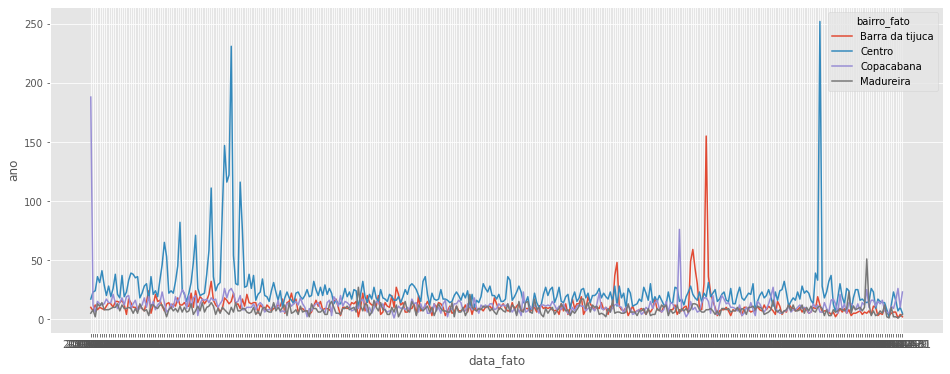

In [78]:
plt.figure(figsize=(16,6))

sns.lineplot(data=parte4_Rio_10bairros_gr[parte4_Rio_10bairros_gr['bairro_fato'].isin(['Centro','Copacabana','Barra da tijuca','Madureira'])],\
             x = 'data_fato', y = 'ano', hue= 'bairro_fato')

In [79]:
parte4_Rio_4bairros = parte4_Rio_10bairros_gr[parte4_Rio_10bairros_gr['bairro_fato'].isin(['Centro','Copacabana','Barra da tijuca','Madureira'])]

In [80]:
parte4_Rio_4bairros[parte4_Rio_4bairros.bairro_fato == "Centro"]

,data_fato,bairro_fato,ano,mes,total_rbft,conteudo,hora_fato,municipio_fato,local
6888,2019-01-01,Centro,17,17,17,17,17,17,17
6898,2019-01-02,Centro,23,23,23,23,23,23,23
6908,2019-01-03,Centro,24,24,24,24,24,24,24
6918,2019-01-04,Centro,36,36,36,36,36,36,36
6928,2019-01-05,Centro,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...
10481,2019-12-27,Centro,23,23,23,23,23,23,23
10491,2019-12-28,Centro,16,16,16,16,16,16,16
10501,2019-12-29,Centro,7,7,7,7,7,7,7
10511,2019-12-30,Centro,10,10,10,10,10,10,10


In [215]:
#parte4_Rio_4bairros[parte4_Rio_4bairros.bairro_fato == j].data_fato.max()
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
from matplotlib.pyplot import cm
import numpy as np
color = cm.rainbow(np.linspace(0, 1, 2))

IndexError: index 2 is out of bounds for axis 0 with size 2

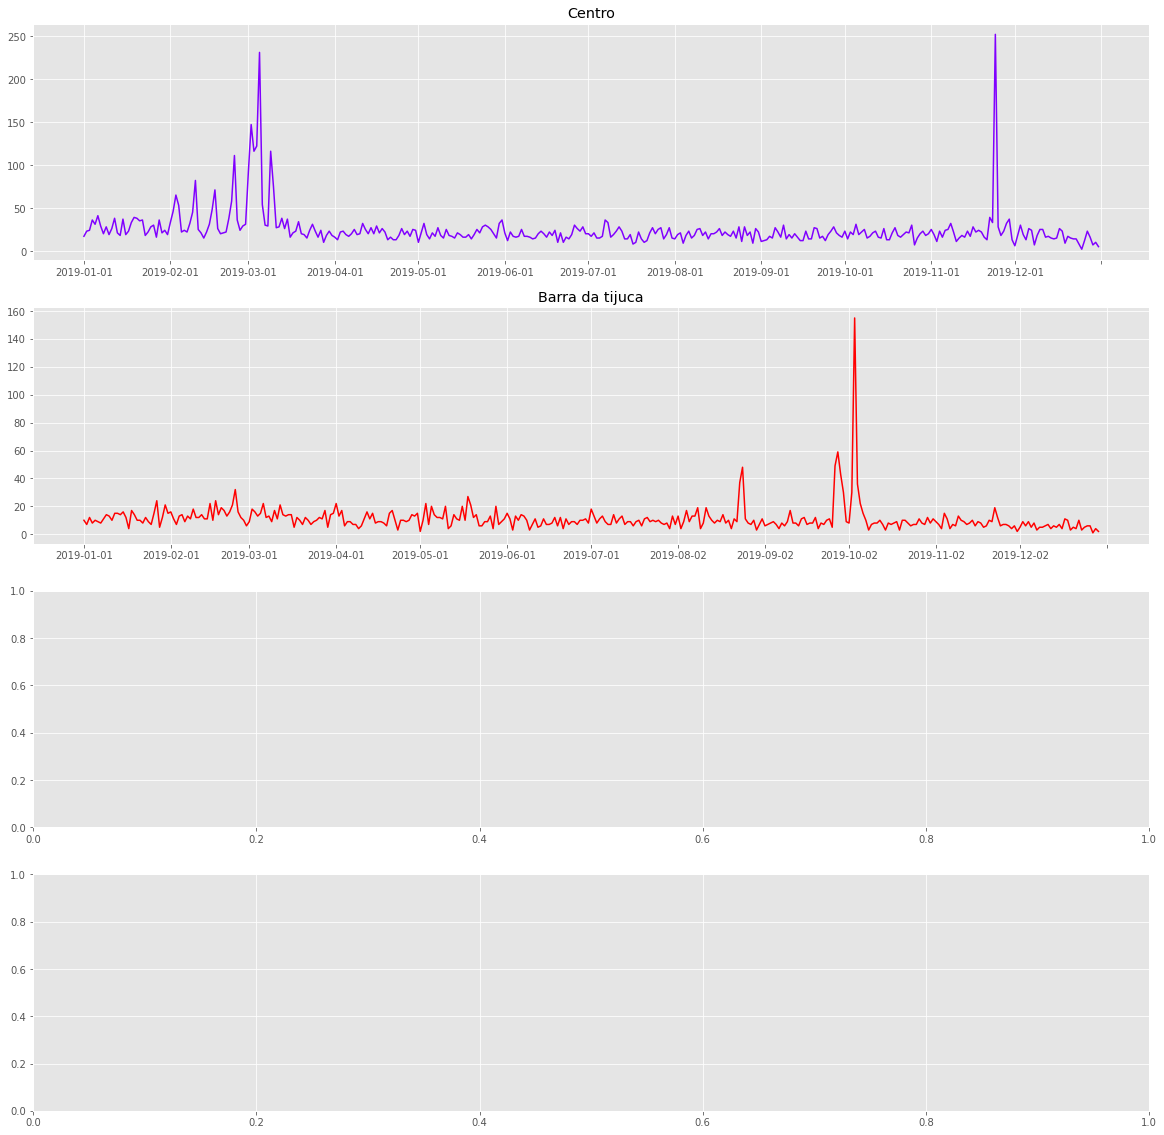

In [216]:
fig, axs = plt.subplots(4,1,figsize=(20,20))
bairros4=["Centro", "Barra da tijuca", "Copacabana", "Madureira"]
for i,j in enumerate (bairros4):
    axs[i].plot(parte4_Rio_4bairros[parte4_Rio_4bairros.bairro_fato == j].data_fato,\
            parte4_Rio_4bairros[parte4_Rio_4bairros.bairro_fato == j].ano,color=color[i])
    axs[i].set_title(j)
    axs[i].xaxis.set_major_locator(MonthLocator())
plt.show()

In [335]:
from matplotlib.dates import MonthLocator, DateFormatter

In [84]:
MonthLocator(bymonth=1)

# Import static feature

## Population data

In [87]:
pop = pd.read_csv("raw_data/population_Rio.csv", encoding='iso-8859-1')

In [88]:
pop.shape

(160, 6)

In [89]:
pop.dtypes

RegiaoAdministrativa    object
Ano                      int64
Populacao                int64
DensidadeBruta          object
DensidadeLiquida        object
TaxaGeometrica          object
dtype: object

In [90]:
pop.head(20)

,RegiaoAdministrativa,Ano,Populacao,DensidadeBruta,DensidadeLiquida,TaxaGeometrica
0,I Portuaria,2000,39973,"47,0","47,1","1,89%"
1,I Portuaria,2005,36338,"42,7","42,8","1,91%"
2,I Portuaria,2010,32999,"38,8","38,9","1,95%"
3,I Portuaria,2015,29905,"35,1","35,2","2,02%"
4,I Portuaria,2020,27001,"31,7","31,8",NaN
5,II Centro,2000,39135,"68,4","68,4","3,30%"
6,II Centro,2005,33098,"57,8","57,8","3,31%"
7,II Centro,2010,27972,"48,9","48,9","3,34%"
8,II Centro,2015,23598,"41,2","41,2","3,41%"
9,II Centro,2020,19839,"34,7","34,7",NaN


In [91]:
def split_bairro(x):
    return " ".join(x.split(" ")[2:])

In [92]:
pop["bairro"] = pop.RegiaoAdministrativa.apply(split_bairro)

In [93]:
pop

,RegiaoAdministrativa,Ano,Populacao,DensidadeBruta,DensidadeLiquida,TaxaGeometrica,bairro
0,I Portuaria,2000,39973,"47,0","47,1","1,89%",Portuaria
1,I Portuaria,2005,36338,"42,7","42,8","1,91%",Portuaria
2,I Portuaria,2010,32999,"38,8","38,9","1,95%",Portuaria
3,I Portuaria,2015,29905,"35,1","35,2","2,02%",Portuaria
4,I Portuaria,2020,27001,"31,7","31,8",NaN,Portuaria
...,...,...,...,...,...,...,...
155,XXXIV Cidade de Deus,2000,38016,"315,3","315,3","0,86%",Cidade de Deus
156,XXXIV Cidade de Deus,2005,36405,"301,9","301,9","0,88%",Cidade de Deus
157,XXXIV Cidade de Deus,2010,3483,"288,9","288,9","0,92%",Cidade de Deus
158,XXXIV Cidade de Deus,2015,33257,"275,8","275,8","0,99%",Cidade de Deus


In [94]:
pop2 = pop[["bairro","Ano", "Populacao", "DensidadeBruta"]]

In [95]:
pop2.iloc[92]

bairro            Santa Cruz
Ano                     2010
Populacao             359112
DensidadeBruta          21,9
Name: 92, dtype: object

In [96]:
pop2

,bairro,Ano,Populacao,DensidadeBruta
0,Portuaria,2000,39973,"47,0"
1,Portuaria,2005,36338,"42,7"
2,Portuaria,2010,32999,"38,8"
3,Portuaria,2015,29905,"35,1"
4,Portuaria,2020,27001,"31,7"
...,...,...,...,...
155,Cidade de Deus,2000,38016,"315,3"
156,Cidade de Deus,2005,36405,"301,9"
157,Cidade de Deus,2010,3483,"288,9"
158,Cidade de Deus,2015,33257,"275,8"


In [97]:
pop3 = pop2[pop2.bairro.isin(["Centro","Copacabana","Barra da Tijuca", "Madureira"])]


In [98]:
pop3.dtypes

bairro            object
Ano                int64
Populacao          int64
DensidadeBruta    object
dtype: object

In [99]:
pop3

,bairro,Ano,Populacao,DensidadeBruta
5,Centro,2000,39135,"68,4"
6,Centro,2005,33098,"57,8"
7,Centro,2010,27972,"48,9"
8,Centro,2015,23598,"41,2"
9,Centro,2020,19839,"34,7"
20,Copacabana,2000,161178,"317,4"
21,Copacabana,2005,150297,"296,0"
22,Copacabana,2010,140015,"275,7"
23,Copacabana,2015,130168,"256,3"
24,Copacabana,2020,120562,"237,4"


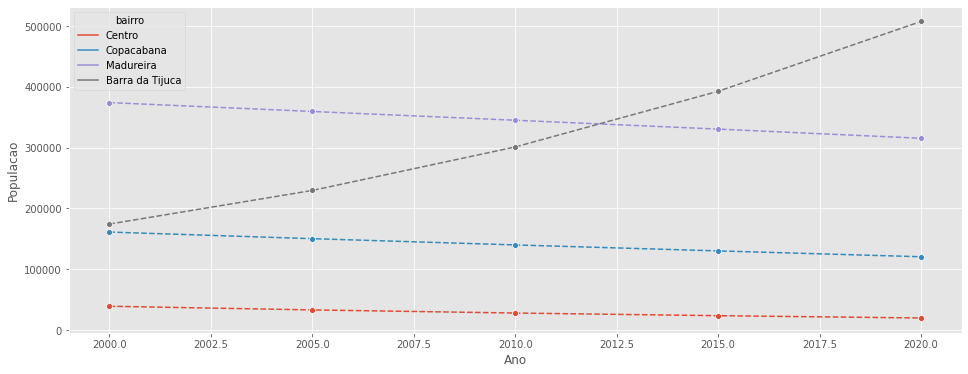

In [100]:
plt.figure(figsize=(16,6))
sns.lineplot(data=pop3, x = "Ano", y = "Populacao", hue ="bairro",linestyle='--', marker="o")
plt.show()

# Clean bairro name according to demographic per bairro

In [101]:
parte1.municipio_fato.value_counts()

Rio de Janeiro (Capital)    85219
Duque de Caxias             13514
São Gonçalo                 11679
Nova Iguaçu                 10025
Niterói                      7826
                            ...  
São Sebastião do Alto         144
Trajano de Moraes             142
Rio das Flores                125
Laje do Muriaé                114
Santa Maria Madalena          105
Name: municipio_fato, Length: 78, dtype: int64

In [123]:
parte1_rio = parte1[parte1["municipio_fato"] == "Rio de Janeiro (Capital)"]

In [124]:
parte1_rio.drop(columns=["ano","mes", "sexo", "cor", "idade", "municipio_vit", "bairro_vit", "relacao", "profissao", "aisp", "risp", "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
parte2_rio = parte2[parte2["municipio_fato"] == "Rio de Janeiro (Capital)"]

In [126]:
parte2_rio.drop(columns=["ano","mes", "sexo", "cor", "idade", "municipio_vit", "bairro_vit", "relacao", "profissao","data_nasc","hora_com", "data_com", "conteudo"], inplace=True)

In [110]:
print(parte1_rio.shape, parte2_rio.shape, parte3_rio.shape,parte4_rio.shape)

(85219, 25) (453172, 23) (422852, 23) (369943, 23)


In [107]:
parte3_rio = parte3[parte3["municipio_fato"] == "Rio de Janeiro (Capital)"]

In [127]:
parte3_rio.drop(columns=["ano","mes", "sexo", "cor", "idade", "municipio_vit", "bairro_vit", "relacao", "profissao","data_nasc","hora_com", "data_com", "conteudo"], inplace=True)

In [108]:
parte4_rio = parte4[parte4["municipio_fato"] == "Rio de Janeiro (Capital)"]

In [128]:
parte4_rio.drop(columns=["ano","mes", "sexo", "cor", "idade", "municipio_vit", "bairro_vit", "relacao", "profissao","data_nasc","hora_com", "data_com", "conteudo"], inplace=True)

In [129]:
parte1_rio.columns

Index(['controle', 'titulo_do', 'total_rbft', 'dp', 'cisp', 'data_fato',
       'hora_fato', 'bairro_fato', 'municipio_fato', 'local'],
      dtype='object')

In [133]:
print(parte1_rio.shape, parte2_rio.shape, parte3_rio.shape,parte4_rio.shape)

(85219, 10) (453172, 10) (422852, 10) (369943, 10)


In [134]:
parte1_rio.controle.value_counts()

60053071-2009    46
72407701-2009    41
47226011-2009    36
86226421-2009    35
52188241-2009    33
                 ..
72647201-2009     1
74125391-2009     1
75362851-2009     1
75388951-2009     1
03691091-2009     1
Name: controle, Length: 62737, dtype: int64

In [135]:
parte2_rio.controle.value_counts()

35068421-2011    14
10620471-2011    11
72367952-2010     9
02519251-2013     8
56054402-2013     8
                 ..
42376211-2011     1
41393661-2011     1
41189011-2011     1
41185211-2011     1
00431451-2014     1
Name: controle, Length: 450679, dtype: int64

In [141]:
parte1_rio.drop_duplicates(inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [142]:
parte1_rio.controle.value_counts()

59313421-2009    4
11991661-2009    3
90888181-2009    3
92465581-2009    3
38241261-2009    3
                ..
90900381-2009    1
91615811-2009    1
92048381-2009    1
92407911-2009    1
99709621-2009    1
Name: controle, Length: 62737, dtype: int64

clean part1


In [205]:
parte1 = pd.read_csv("raw_data/parte1.csv", sep=";", encoding='iso-8859-1')
parte1_rio = parte1[parte1["municipio_fato"] == "Rio de Janeiro (Capital)"]
parte1_rio.drop(columns=["ano","mes", "sexo", "cor", "idade", "municipio_vit",\
                         "bairro_vit", "relacao", "profissao", "aisp", "risp", \
                         "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)
parte1_rio.drop_duplicates(subset="controle", keep="first", inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:

parte1_rio.shape

(67447, 10)

In [145]:
parte1_rio.drop_duplicates(subset="controle", keep="first", inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [146]:
parte2_rio.drop_duplicates(subset="controle", keep="first", inplace=True)

In [147]:
parte3_rio.drop_duplicates(subset="controle", keep="first", inplace=True)

In [148]:
parte4_rio.drop_duplicates(subset="controle", keep="first", inplace=True)

In [154]:
print(parte1_rio.shape, parte2_rio.shape, parte3_rio.shape, parte4_rio.shape)

(62737, 10) (450679, 10) (420974, 10) (368398, 10)


In [159]:
rio_df = pd.concat([parte1_rio, parte2_rio, parte3_rio, parte4_rio])

In [161]:
rio_df.bairro_fato.value_counts()

CENTRO                          66912
sem informação                  50870
Centro                          40046
CAMPO GRANDE                    27716
BANGU                           26605
                                ...  
MALLET  - REALENGO                  1
PARQUE UNIÃO  -  BONSUCESSO.        1
SANTA CRZU                          1
CAMPP GRANDE                        1
Praia do saco                       1
Name: bairro_fato, Length: 15242, dtype: int64

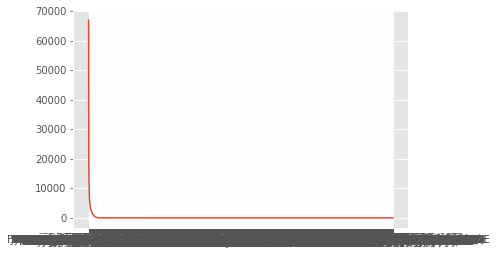

In [212]:
plt.plot(rio_df.bairro_fato.value_counts())

In [213]:
rio_df.groupby("bairro_fato").sum()

,controle,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,municipio_fato,local
bairro_fato,,,,,,,,,
""" CINCO BOCAS "" / BRÁS DE PINA",12248691-2013,Morte por intervenção de agente do Estado,Não se aplica,022a. Penha,022a. Penha,2013-10-10,12:45,Rio de Janeiro (Capital),Residência
"""OBRIGADO MEU DEUS""",81886811-2014,Estupro,Não se aplica,034a. Bangu,039a. Pavuna,2014-04-03,14:00,Rio de Janeiro (Capital),Favela
"""OURO PRETO"", ENG DE DENTRO",48923641-2011,Roubo a residência,Roubo,026a. Todos os Santos,026a. Todos os Santos,2010-11-05,12:00,Rio de Janeiro (Capital),Residência
"""ROCHA MIRANDA",47279021-2011,Roubo de veículo,Roubo,040a. Honório Gurgel,040a. Honório Gurgel,2011-08-21,07:20,Rio de Janeiro (Capital),Via pública
"""nao informado""",11680341-2017,Roubo de carga,Roubo,Delegacia de Roubos e Furtos de Cargas,004a. Praça da República,2017-07-26,00:00,Rio de Janeiro (Capital),Via pública
...,...,...,...,...,...,...,...,...,...
ÁREA DA 5ª DP,43107161-201363492481-201307604642-2013,Furto a transeunteFurto a transeunteFurto a tr...,FurtoFurtoFurto,031a. Ricardo Albuquerque031a. Ricardo Albuque...,031a. Ricardo Albuquerque031a. Ricardo Albuque...,2013-02-042013-02-042013-04-17,00:0000:0000:00,Rio de Janeiro (Capital)Rio de Janeiro (Capita...,Via públicaVia públicaVia pública
ÁREA NOBRE,10771131-2012,Estupro,Não se aplica,004a. Praça da República,004a. Praça da República,2009-10-19,99,Rio de Janeiro (Capital),Residência
ÁVUNA,99753501-2011,Roubo de aparelho celular,Roubo,039a. Pavuna,039a. Pavuna,2011-04-16,99,Rio de Janeiro (Capital),Via pública


# Import crime data

## pre cleaning

In [180]:
parte1 = pd.read_csv("raw_data/parte1.csv", sep=";", encoding='iso-8859-1')
print(parte1.shape)
parte1_rio = parte1[parte1["municipio_fato"] == "Rio de Janeiro (Capital)"]
print(parte1_rio.shape)
parte1_rio.drop(columns=["mes", "sexo", "cor", "idade", "municipio_vit",\
                         "bairro_vit", "relacao", "profissao", "aisp", "risp", \
                         "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)
parte1_rio.drop_duplicates(subset="controle", keep="first", inplace=True)
print(parte1_rio.shape)


(220398, 25)
(85219, 25)
(62737, 11)


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [181]:
parte1_rio.shape

(62737, 11)

In [182]:
parte2 = pd.read_csv("raw_data/parte2.csv", sep=";", encoding='iso-8859-1')
print(parte2.shape)
parte2_rio = parte2[parte2["municipio_fato"] == "Rio de Janeiro (Capital)"]
print(parte2_rio.shape)
parte2_rio.drop(columns=["mes", "sexo", "cor", "idade", "municipio_vit",\
                         "bairro_vit", "relacao", "profissao", \
                         "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)
parte2_rio.drop_duplicates(subset="controle", keep="first", inplace=True)
print(parte2_rio.shape)

(800000, 23)
(453172, 23)
(450679, 11)


In [183]:
parte3 = pd.read_csv("raw_data/parte3.csv", sep=";", encoding='iso-8859-1')
print(parte3.shape)
parte3_rio = parte3[parte3["municipio_fato"] == "Rio de Janeiro (Capital)"]
print(parte3_rio.shape)
parte3_rio.drop(columns=["mes", "sexo", "cor", "idade", "municipio_vit",\
                         "bairro_vit", "relacao", "profissao", \
                         "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)
parte3_rio.drop_duplicates(subset="controle", keep="first", inplace=True)
print(parte3_rio.shape)

(800000, 23)
(422852, 23)
(420974, 11)


In [184]:
parte4 = pd.read_csv("raw_data/parte4.csv", sep=";", encoding='iso-8859-1')
print(parte4.shape)
parte4_rio = parte4[parte4["municipio_fato"] == "Rio de Janeiro (Capital)"]
print(parte4_rio.shape)
parte4_rio.drop(columns=["mes", "sexo", "cor", "idade", "municipio_vit",\
                         "bairro_vit", "relacao", "profissao", \
                         "data_nasc","hora_com", "data_com", "conteudo"], inplace=True)
parte4_rio.drop_duplicates(subset="controle", keep="first", inplace=True)
print(parte4_rio.shape)

(701669, 23)
(369943, 23)
(368398, 11)


In [208]:
rio_df = pd.concat([parte1_rio, parte2_rio, parte3_rio, parte4_rio])

In [186]:
rio_df.head()

,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,bairro_fato,municipio_fato,local
0,00787401-2009,2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,04:30,PRAIA DA BRISA/PEDRA DE GUARAT,Rio de Janeiro (Capital),Praia
5,01137431-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,SANTISSIMO,Rio de Janeiro (Capital),Residência
9,02023941-2009,2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,040a. Honório Gurgel,2008-12-31,20:30,HONÓRIO GURGEL,Rio de Janeiro (Capital),Residência
15,02646521-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,VASCONCELOS,Rio de Janeiro (Capital),Residência
19,04751871-2009,2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,035a. Campo Grande,2009-01-01,01:30,CAMPO GRANDE,Rio de Janeiro (Capital),Via pública


## count how many occurence per bairros

In [187]:
rio_df_bairrocount= rio_df.groupby("bairro_fato").count()

In [188]:
rio_df_bairrocount

,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,municipio_fato,local
bairro_fato,,,,,,,,,,
""" CINCO BOCAS "" / BRÁS DE PINA",1,1,1,1,1,1,1,1,1,1
"""OBRIGADO MEU DEUS""",1,1,1,1,1,1,1,1,1,1
"""OURO PRETO"", ENG DE DENTRO",1,1,1,1,1,1,1,1,1,1
"""ROCHA MIRANDA",1,1,1,1,1,1,1,1,1,1
"""nao informado""",1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
ÁREA DA 5ª DP,3,3,3,3,3,3,3,3,3,3
ÁREA NOBRE,1,1,1,1,1,1,1,1,1,1
ÁVUNA,1,1,1,1,1,1,1,1,1,1


In [189]:
rio_df_bairrocount.reset_index(inplace=True)

<AxesSubplot:xlabel='bairro_fato', ylabel='controle'>

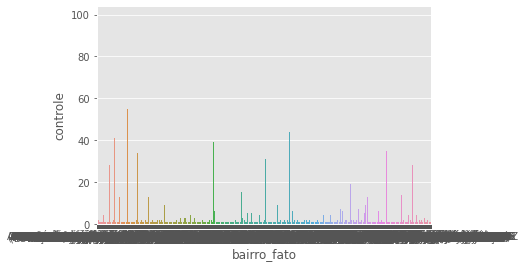

In [38]:
sns.barplot(data=rio_df_bairrocount[rio_df_bairrocount["controle"]<100], x="bairro_fato", y="controle")

In [190]:
rio_df.shape

(1302788, 11)

In [191]:
bairros = rio_df.bairro_fato.tolist()

## import list of existing bairros

In [58]:
bairros_true = pd.read_csv("raw_data/bairros_lista.csv", encoding='iso-8859-1')

In [59]:
bairros_true_list = bairros_true.Bairro.tolist()

In [60]:
len(bairros_true_list)

158

In [51]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [87]:
process.extractOne('SANTISSIMO', bairros_true_list, score_cutoff = 60)

('Santissimo', 100)

In [75]:
len(bairros)

1302788

In [88]:
%%time
mat1 = []
for i in bairros[0:10]:
    mat1.append(process.extract(i, bairros_true_list, limit=1))
    print(i, process.extract(i, bairros_true_list, limit=1))

    #rio_df.head()['matches'] = mat1
#rio_df["matches"]=mat1

PRAIA DA BRISA/PEDRA DE GUARAT [('Barra da Tijuca', 86)]
SANTISSIMO [('Santissimo', 100)]
HONÓRIO GURGEL [('Honorio Gurgel', 96)]
VASCONCELOS [('Lins de Vasconcellos', 82)]
CAMPO GRANDE [('Campo Grande', 100)]
RICARDO DE ALBUQUERQUE [('Ricardo de Albuquerque', 100)]
SAÚDE [('Saude', 89)]
BARRA DA TIJUCA [('Barra da Tijuca', 100)]
JACARÉ [('Jacare', 91)]
SÃO CRISTÓVÃO [('Sao Cristovao', 87)]
CPU times: user 163 ms, sys: 3.67 ms, total: 166 ms
Wall time: 165 ms


In [104]:
bairros_true_df = pd.DataFrame(bairros_true_list, columns=["bairros"])

In [105]:
bairros_true_df

,bairros
0,Lagoa
1,Leblon
2,Ipanema
3,Humaita
4,Urca
...,...
153,Guaratiba
154,Vargem Pequena
155,Vargem Grande
156,Camorim


In [108]:
bairros_true_df.set_index("bairros")

""
bairros
Lagoa
Leblon
Ipanema
Humaita
Urca
...
Guaratiba
Vargem Pequena
Vargem Grande


### Remove all accents

In [171]:
unidecode.unidecode("JACARÉ")

'JACARE'

In [209]:
def remove_accent(str_):
    return unidecode.unidecode(str_)

In [210]:
rio_df.bairro_fato = rio_df.bairro_fato.map(lambda x: unidecode.unidecode(x))

In [211]:
rio_df.bairro_fato

0         PRAIA DA BRISA/PEDRA DE GUARAT
5                             SANTISSIMO
9                         HONORIO GURGEL
15                           VASCONCELOS
19                          CAMPO GRANDE
                       ...              
701661                        Copacabana
701662                            Centro
701663                            Centro
701667                    sem informacao
701668                    sem informacao
Name: bairro_fato, Length: 1302788, dtype: object

In [196]:
rio_df

,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,bairro_fato,municipio_fato,local
0,00787401-2009,2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,04:30,PRAIA DA BRISA/PEDRA DE GUARAT,Rio de Janeiro (Capital),Praia
5,01137431-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,SANTISSIMO,Rio de Janeiro (Capital),Residência
9,02023941-2009,2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,040a. Honório Gurgel,2008-12-31,20:30,HONORIO GURGEL,Rio de Janeiro (Capital),Residência
15,02646521-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,VASCONCELOS,Rio de Janeiro (Capital),Residência
19,04751871-2009,2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,035a. Campo Grande,2009-01-01,01:30,CAMPO GRANDE,Rio de Janeiro (Capital),Via pública
...,...,...,...,...,...,...,...,...,...,...,...
701661,98313421-2019,2019,Furto a transeunte,Furto,012a. Copacabana,012a. Copacabana,2019-12-29,19:00,Copacabana,Rio de Janeiro (Capital),Via pública
701662,98452031-2019,2019,Furto a transeunte,Furto,014a. Leblon,014a. Leblon,2019-12-30,11:45,Centro,Rio de Janeiro (Capital),Interior de coletivo
701663,98535391-2019,2019,Furto a transeunte,Furto,004a. Praça da República,004a. Praça da República,2019-12-31,19:00,Centro,Rio de Janeiro (Capital),Estação metroviária
701667,99563211-2019,2019,Roubo de veículo,Roubo,048a. Seropédica,041a. Tanque,2019-12-30,17:35,sem informacao,Rio de Janeiro (Capital),Via pública


### first replace Barra with Barra da Tijuca or it will be assigned to another barra

In [197]:
def barra_replace(row):
    if row == "Barra":
        row= "Barra da Tijuca"
    return row

rio_df.bairro_fato.map(barra_replace)

0         PRAIA DA BRISA/PEDRA DE GUARAT
5                             SANTISSIMO
9                         HONORIO GURGEL
15                           VASCONCELOS
19                          CAMPO GRANDE
                       ...              
701661                        Copacabana
701662                            Centro
701663                            Centro
701667                    sem informacao
701668                    sem informacao
Name: bairro_fato, Length: 1302788, dtype: object

In [199]:
rio_df.bairro_fato = rio_df.bairro_fato.map(barra_replace)

In [200]:
rio_df

,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,bairro_fato,municipio_fato,local
0,00787401-2009,2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,04:30,PRAIA DA BRISA/PEDRA DE GUARAT,Rio de Janeiro (Capital),Praia
5,01137431-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,SANTISSIMO,Rio de Janeiro (Capital),Residência
9,02023941-2009,2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,040a. Honório Gurgel,2008-12-31,20:30,HONORIO GURGEL,Rio de Janeiro (Capital),Residência
15,02646521-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,VASCONCELOS,Rio de Janeiro (Capital),Residência
19,04751871-2009,2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,035a. Campo Grande,2009-01-01,01:30,CAMPO GRANDE,Rio de Janeiro (Capital),Via pública
...,...,...,...,...,...,...,...,...,...,...,...
701661,98313421-2019,2019,Furto a transeunte,Furto,012a. Copacabana,012a. Copacabana,2019-12-29,19:00,Copacabana,Rio de Janeiro (Capital),Via pública
701662,98452031-2019,2019,Furto a transeunte,Furto,014a. Leblon,014a. Leblon,2019-12-30,11:45,Centro,Rio de Janeiro (Capital),Interior de coletivo
701663,98535391-2019,2019,Furto a transeunte,Furto,004a. Praça da República,004a. Praça da República,2019-12-31,19:00,Centro,Rio de Janeiro (Capital),Estação metroviária
701667,99563211-2019,2019,Roubo de veículo,Roubo,048a. Seropédica,041a. Tanque,2019-12-30,17:35,sem informacao,Rio de Janeiro (Capital),Via pública


### Probabilistic matching with fuzzy matcher

In [201]:
import fuzzymatcher

In [202]:
%%time
new_data = fuzzymatcher.fuzzy_left_join(rio_df, bairros_true_df, left_on="bairro_fato", right_on="bairros")

CPU times: user 9min 26s, sys: 21 s, total: 9min 47s
Wall time: 10min


In [203]:
new_data.head()

,best_match_score,__id_left,__id_right,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,bairro_fato,municipio_fato,local,bairros
0,-0.216713,0_left,114_right,00787401-2009,2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,04:30,PRAIA DA BRISA/PEDRA DE GUARAT,Rio de Janeiro (Capital),Praia,Pedra de Guaratiba
16,0.162033,1_left,139_right,01137431-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,SANTISSIMO,Rio de Janeiro (Capital),Residência,Santissimo
17,0.405996,2_left,107_right,02023941-2009,2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,040a. Honório Gurgel,2008-12-31,20:30,HONORIO GURGEL,Rio de Janeiro (Capital),Residência,Honorio Gurgel
18,NaN,3_left,None,02646521-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,VASCONCELOS,Rio de Janeiro (Capital),Residência,NaN
19,0.278060,4_left,128_right,04751871-2009,2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,035a. Campo Grande,2009-01-01,01:30,CAMPO GRANDE,Rio de Janeiro (Capital),Via pública,Campo Grande


In [204]:
new_data_2 = new_data[["best_match_score","bairro_fato","bairros"]]

In [205]:
new_data_2[new_data_2.best_match_score.isna()]

,best_match_score,bairro_fato,bairros
18,NaN,VASCONCELOS,NaN
40,NaN,CORCUNDINHA,NaN
163,NaN,BOIUNA,NaN
201,NaN,VASCONCELOS,NaN
253,NaN,00,NaN
...,...,...,...
1490471,NaN,sem informacao,NaN
1490478,NaN,sem informacao,NaN
1490498,NaN,sem informacao,NaN
1490503,NaN,sem informacao,NaN


### second path missing bairros matching

In [229]:
missing_barrios = new_data_2[new_data_2.bairros.isna()].bairro_fato.tolist()

In [230]:
missing_barrios

['VASCONCELOS',
 'CORCUNDINHA',
 'BOIUNA',
 'VASCONCELOS',
 '00',
 'CAVALCANTE',
 'CAMINHO',
 'MEUDOM',
 'sem informacao',
 'sem informacao',
 'DIVERSOS',
 'JD MARAVILHA',
 '00',
 '00',
 'URUCANIA',
 '00',
 'ANCHIENTA',
 'sem informacao',
 '4o CENTENARIO - JPA',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'ROLAS I',
 'ANCHIENTA',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'CESARAO',
 'JD MARAVILHA',
 'sem informacao',
 'PITANGUEIRA',
 'LAGOMAR',
 'KM 32',
 'SEN. VASCONCELOS -CG',
 'sem informacao',
 'sem informacao',
 'LEOPOLDINA',
 'sem informacao',
 '00',
 '00',
 'CONJUNTO LIBERDADE',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'CAVALCANTE',
 'ANTARES',
 'FUNDOS',
 'sem informacao',
 'sem informacao',
 'FUNDAO/IG',
 'sem informacao',
 'NOSSA SENHORA DAS GRACAS',
 'CHICO MENDES',
 'MALLET',
 'sem informacao',
 'BRISA',
 'TIRIACU',
 'sem informacao',
 'sem informacao',
 'BOIUNA',
 'GREJAU',
 'sem informaca

In [231]:
len(missing_barrios)

82713

In [252]:
%%time
mat2 = []
for i in missing_barrios:
    mat2.append(process.extractOne(i, bairros_true_list, score_cutoff=70))

CPU times: user 8min 44s, sys: 1.05 s, total: 8min 45s
Wall time: 8min 45s


In [238]:
len(mat2)

82713

In [247]:
mat2[9][1]

60

In [250]:
count = 0
for i in range(len(missing_barrios)):
    if mat2[i][1]<70:
        count +=1
    

In [251]:
count

76098

In [244]:
missing_barrios

['VASCONCELOS',
 'CORCUNDINHA',
 'BOIUNA',
 'VASCONCELOS',
 '00',
 'CAVALCANTE',
 'CAMINHO',
 'MEUDOM',
 'sem informacao',
 'sem informacao',
 'DIVERSOS',
 'JD MARAVILHA',
 '00',
 '00',
 'URUCANIA',
 '00',
 'ANCHIENTA',
 'sem informacao',
 '4o CENTENARIO - JPA',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'ROLAS I',
 'ANCHIENTA',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'CESARAO',
 'JD MARAVILHA',
 'sem informacao',
 'PITANGUEIRA',
 'LAGOMAR',
 'KM 32',
 'SEN. VASCONCELOS -CG',
 'sem informacao',
 'sem informacao',
 'LEOPOLDINA',
 'sem informacao',
 '00',
 '00',
 'CONJUNTO LIBERDADE',
 'sem informacao',
 'sem informacao',
 'sem informacao',
 'CAVALCANTE',
 'ANTARES',
 'FUNDOS',
 'sem informacao',
 'sem informacao',
 'FUNDAO/IG',
 'sem informacao',
 'NOSSA SENHORA DAS GRACAS',
 'CHICO MENDES',
 'MALLET',
 'sem informacao',
 'BRISA',
 'TIRIACU',
 'sem informacao',
 'sem informacao',
 'BOIUNA',
 'GREJAU',
 'sem informaca

### Merge with Regiao Administrativa

# Clean Bairro cleaning

## remove accent ok

## Change barra into Barra da tijuca

In [258]:
def barra_replace(row):
    if row == "Barra":
        row= "Barra da Tijuca"
    return row

rio_df.bairro_fato = rio_df.bairro_fato.map(barra_replace)

## 1st pass similarity replace

In [278]:
rio_df

,controle,ano,titulo_do,total_rbft,dp,cisp,data_fato,hora_fato,bairro_fato,municipio_fato,local
0,00787401-2009,2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,04:30,PRAIA DA BRISA/PEDRA DE GUARAT,Rio de Janeiro (Capital),Praia
5,01137431-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,SANTISSIMO,Rio de Janeiro (Capital),Residência
9,02023941-2009,2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,040a. Honório Gurgel,2008-12-31,20:30,HONORIO GURGEL,Rio de Janeiro (Capital),Residência
15,02646521-2009,2009,Lesão corporal dolosa,Não se aplica,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,19:00,VASCONCELOS,Rio de Janeiro (Capital),Residência
19,04751871-2009,2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,035a. Campo Grande,2009-01-01,01:30,CAMPO GRANDE,Rio de Janeiro (Capital),Via pública
...,...,...,...,...,...,...,...,...,...,...,...
701661,98313421-2019,2019,Furto a transeunte,Furto,012a. Copacabana,012a. Copacabana,2019-12-29,19:00,Copacabana,Rio de Janeiro (Capital),Via pública
701662,98452031-2019,2019,Furto a transeunte,Furto,014a. Leblon,014a. Leblon,2019-12-30,11:45,Centro,Rio de Janeiro (Capital),Interior de coletivo
701663,98535391-2019,2019,Furto a transeunte,Furto,004a. Praça da República,004a. Praça da República,2019-12-31,19:00,Centro,Rio de Janeiro (Capital),Estação metroviária
701667,99563211-2019,2019,Roubo de veículo,Roubo,048a. Seropédica,041a. Tanque,2019-12-30,17:35,sem informacao,Rio de Janeiro (Capital),Via pública


In [280]:
bairros_true_df

,bairros
0,Lagoa
1,Leblon
2,Ipanema
3,Humaita
4,Urca
...,...
153,Guaratiba
154,Vargem Pequena
155,Vargem Grande
156,Camorim


In [ ]:
import fuzzymatcher

In [ ]:
## 10 minutes process!!
new_data = fuzzymatcher.fuzzy_left_join(rio_df, bairros_true_df, left_on="bairro_fato", right_on="bairros")

## second path missing bairros similarity matching

In [ ]:
new_data_2 = new_data[["best_match_score","bairro_fato","bairros"]]

In [259]:
missing_barrios = new_data_2[new_data_2.bairros.isna()].bairro_fato

In [262]:
missing_barrios_df = pd.DataFrame(missing_barrios)

In [276]:
missing_barrios_df.iloc[0:2]

,bairro_fato
18,VASCONCELOS
40,CORCUNDINHA


In [263]:
for i in missing_barrios_df:
    print(i)

bairro_fato


In [ ]:
mat2 = []
for i in missing_barrios:
    mat2.append(process.extractOne(i, bairros_true_list, score_cutoff=70))

In [289]:
count = 0
for i in range(len(mat2)):
    if mat2[i]==None:
        count +=1

In [290]:
count

76098

In [ ]:
## find a way to get mat 2 into missing bairros

## aggregate to AR

In [300]:
bairros_true

,N¼,Bairro,R.A,Regiao,IDS
0,1,Lagoa,Lagoa,Zona Sul,0.854
1,2,Leblon,Lagoa,Zona Sul,"0,809"
2,3,Ipanema,Lagoa,Zona Sul,"0,801"
3,4,Humaita,Botafogo,Zona Sul,"0,798"
4,5,Urca,Botafogo,Zona Sul,"0,795"
...,...,...,...,...,...
153,154,Guaratiba,Guaratiba,Zona Oeste,"0,433"
154,155,Vargem Pequena,Barra da Tijuca,Zona Oeste,"0,425"
155,156,Vargem Grande,Barra da Tijuca,Zona Oeste,"0,408"
156,157,Camorim,Jacarepagua,Zona Oeste,"0,369"


In [155]:
rio_df_2 = pd.merge(new_data,bairros_true,left_on='bairros', right_on='Bairro',how='left').drop(columns=["Regiao","IDS","Bairro"])

In [157]:
rio_df_2.columns

Index(['best_match_score', '__id_left', '__id_right', 'controle', 'ano',
       'titulo_do', 'total_rbft', 'dp', 'cisp', 'data_fato', 'hora_fato',
       'bairro_fato', 'municipio_fato', 'local', 'bairros', 'N¼', 'R.A'],
      dtype='object')

In [ ]:
### 

# Crime / Pop

In [319]:
rio_df_3 = rio_df_2.groupby(["data_fato","R.A"]).count()

In [320]:
rio_df_3.reset_index(inplace=True)

In [354]:
rio_df_4 = rio_df_3[["data_fato","R.A","best_match_score"]]

In [358]:
rio_df_4.unstack(level =1)

data_fato         0         1710-10-24
                  1         1716-03-24
                  2         1900-01-01
                  3         1900-01-01
                  4         1900-01-17
                               ...    
best_match_score  113477             1
                  113478             3
                  113479             2
                  113480             1
                  113481             1
Length: 340446, dtype: object

In [325]:
rio_df_3_sc = rio_df_3_sc[rio_df_3_sc.data_fato>"2009-01-01"]

In [326]:
rio_df_3_sc

,data_fato,R.A,best_match_score,__id_left,__id_right,controle,ano,titulo_do,total_rbft,dp,cisp,hora_fato,bairro_fato,municipio_fato,local,bairros,N¼
1699,2009-01-03,Sao Cristovao,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1725,2009-01-04,Sao Cristovao,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1751,2009-01-05,Sao Cristovao,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1778,2009-01-06,Sao Cristovao,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1806,2009-01-07,Sao Cristovao,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113365,2019-12-27,Sao Cristovao,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
113393,2019-12-28,Sao Cristovao,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
113423,2019-12-29,Sao Cristovao,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
113451,2019-12-30,Sao Cristovao,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [346]:
rio_df_3.groupby("R.A").count()

,data_fato,best_match_score,__id_left,__id_right,controle,ano,titulo_do,total_rbft,dp,cisp,hora_fato,bairro_fato,municipio_fato,local,bairros,N¼
R.A,,,,,,,,,,,,,,,,
Anchieta,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063
Bangu,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098
Barra da Tijuca,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081
Botafogo,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065
Campo Grande,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152
Centro,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104,4104
Cidade de Deus,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920
Complexo do Alemao,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688
Copacabana,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063


<AxesSubplot:xlabel='data_fato', ylabel='bairros'>

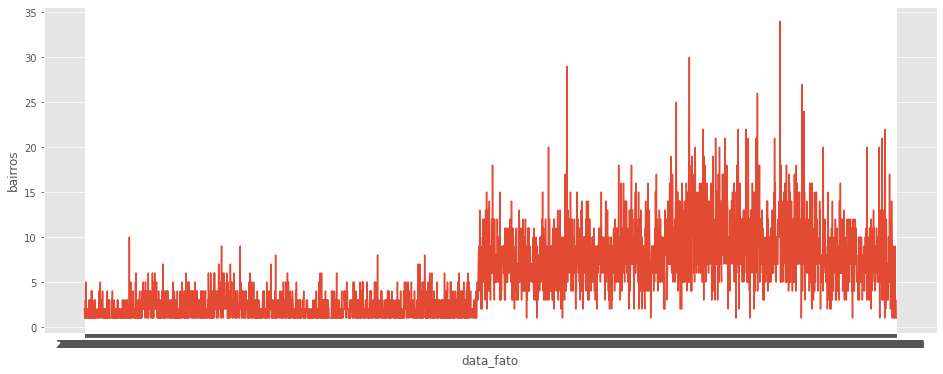

In [328]:
plt.figure(figsize=(16,6))
sns.lineplot(data=rio_df_3[rio_df_3["R.A"]==], x = "data_fato", y = "bairros")

In [336]:
MonthLocator(bymonth=1)

0 Anchieta
1 Portuaria
2 Vigario Geral
3 Barra da Tijuca
4 Botafogo


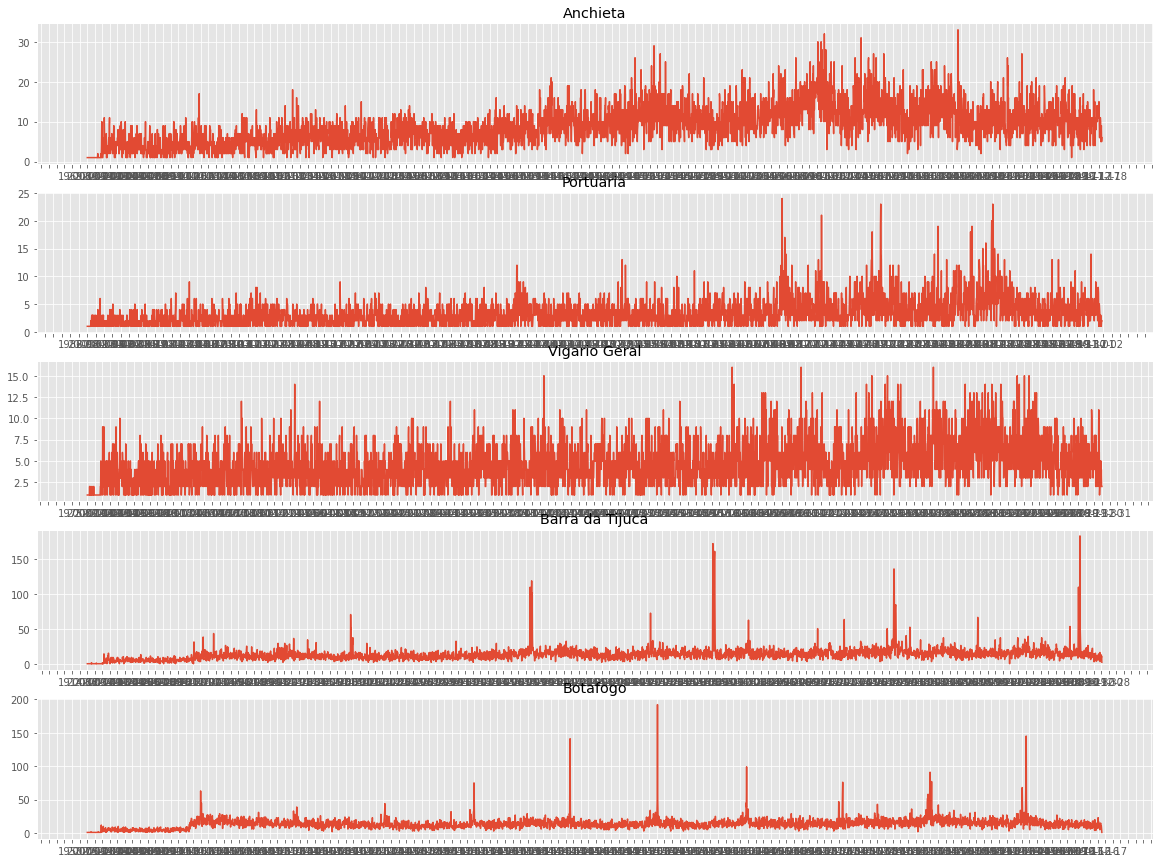

In [349]:
fig, axs = plt.subplots(5,1,figsize=(20,15))
bairros_true_list

for i,j in enumerate (["Anchieta","Portuaria","Vigario Geral", "Barra da Tijuca","Botafogo" ] ):
    print(i,j)
    axs[i].plot(rio_df_3[rio_df_3["R.A"] == j].data_fato,\
            rio_df_3[rio_df_3["R.A"] == j].ano)
    axs[i].set_title(j)
    axs[i].xaxis.set_major_locator(MonthLocator())
plt.show()

In [359]:
rio_df_3

,data_fato,R.A,best_match_score,__id_left,__id_right,controle,ano,titulo_do,total_rbft,dp,cisp,hora_fato,bairro_fato,municipio_fato,local,bairros,N¼
0,1710-10-24,Tijuca,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1716-03-24,Copacabana,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1900-01-01,Bangu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1900-01-01,Madureira,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1900-01-17,Ramos,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113477,2019-12-31,Sao Cristovao,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
113478,2019-12-31,Tijuca,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
113479,2019-12-31,Vigario Geral,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
113480,2019-12-31,Vila Isabel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Get demo pop data

In [360]:
data = pd.read_csv("raw_data/population_Rio.csv", sep=",")
def clean_pop_data(data):
    data = data.drop(columns=["DensidadeBruta", "DensidadeLiquida", "TaxaGeometrica"])
    
    # Get rid of Roman numbers in front of name of administrative regions
    splitted_regions = data['RegiaoAdministrativa'].str.split().str[1:]
    cleaned_regions = splitted_regions.str.join(" ")
    data["administrative_regions"] = cleaned_regions
    data = data.drop(columns=["RegiaoAdministrativa"])
    
    # Dictionary of population data per region for 2000-2020 in 5-years steps
    regions_dict = {}
    for region in data["administrative_regions"].unique():
        regions_dict[region] = data[data["administrative_regions"]==region]
        
    # Dataframe with years for 2000-2020 in 1-year steps
    year_df = pd.DataFrame(pd.period_range(min(data.Ano), max(data.Ano), freq="Y"), columns=["Ano"])
    year_df = year_df[["Ano"]].astype("str").astype("int64")
    
    # Extend time series to annual time series and interpolate lineraly the missing population data
    middle_dict = {}
    for k, v in regions_dict.items():
        middle_dict[k] = year_df.merge(v, how="left", on="Ano")
        middle_dict[k]["administrative_regions"].fillna(value=k, inplace=True)
        middle_dict[k]["Populacao"].interpolate(method='linear', inplace=True)
        
        
    # Create a new dataframe with cleand and extended population data
    empty = pd.DataFrame(columns=["Ano", "Populacao", "administrative_regions"])
    df = pd.concat(middle_dict).reset_index().drop(columns=["level_0", "level_1"])
    
    return df
pop_data = clean_pop_data(data)

In [361]:
pop_data

,Ano,Populacao,administrative_regions
0,2000,39973.0,Portuaria
1,2001,39246.0,Portuaria
2,2002,38519.0,Portuaria
3,2003,37792.0,Portuaria
4,2004,37065.0,Portuaria
...,...,...,...
667,2016,32933.8,Cidade de Deus
668,2017,32610.6,Cidade de Deus
669,2018,32287.4,Cidade de Deus
670,2019,31964.2,Cidade de Deus


In [363]:
rio_df_3

,data_fato,R.A,best_match_score,__id_left,__id_right,controle,ano,titulo_do,total_rbft,dp,cisp,hora_fato,bairro_fato,municipio_fato,local,bairros,N¼
0,1710-10-24,Tijuca,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1716-03-24,Copacabana,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1900-01-01,Bangu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1900-01-01,Madureira,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1900-01-17,Ramos,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113477,2019-12-31,Sao Cristovao,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
113478,2019-12-31,Tijuca,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
113479,2019-12-31,Vigario Geral,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
113480,2019-12-31,Vila Isabel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [364]:
rio_df_4

,data_fato,R.A,best_match_score
0,1710-10-24,Tijuca,1
1,1716-03-24,Copacabana,1
2,1900-01-01,Bangu,1
3,1900-01-01,Madureira,1
4,1900-01-17,Ramos,1
...,...,...,...
113477,2019-12-31,Sao Cristovao,1
113478,2019-12-31,Tijuca,3
113479,2019-12-31,Vigario Geral,2
113480,2019-12-31,Vila Isabel,1


In [366]:
rio_df_4.dtypes

data_fato           object
R.A                 object
best_match_score     int64
dtype: object